In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

## Overview

The goal of this projrct is detect the value of coins in an image and count the total of the change using Computer Vision.

## About the Canny Algorithm : 
Developed by John F. Canny in 1986, the Canny edge detection is widely used in computer vision applications. The algorithm consists of the following steps:

1. **Noise Reduction (Gaussian Blur):** Before applying edge detection, it's common to reduce noise in the image using a Gaussian blur. This step helps in removing small details and emphasizing the larger structures. The Gaussian blur is applied to the image using a convolution operation with a Gaussian kernel resulting a smoothed image.

2. **Gradient Calculation:** Compute the image gradients to find the intensity change in different directions. The gradient magnitude and direction can be calculated using convolution with Sobel filters. The Sobel operators are used to approximate the derivatives of the image in the x and y directions Gx and Gy.


- **Gradient Magnitude:** $$\sqrt{G_x^2 + G_y^2}$$
- **Gradient Direction:** $$\arctan\left(\frac{G_x}{G_y}\right)$$

3. **Non-maximum Suppression:** This step involves thinning the edges by keeping only the local maxima in the gradient direction. This helps in preserving the most significant edges. For each pixel, the algorithm checks if the gradient magnitude is a local maximum along the gradient direction. If it is not, the pixel value is set to zero.

4. **Edge Tracking by Hysteresis:** The edges obtained from the non-maximum suppression step might still be noisy. Hysteresis thresholding is applied to distinguish between weak and strong edges. Pixels with gradient magnitudes above a high threshold are considered strong edges, and pixels between the low and high thresholds are considered weak edges. Weak edges are retained only if they are connected to strong edges.

# The Hough Circle Transform 
Is a feature extraction technique used in computer vision to identify circles in an image. It is an extension of the Hough Line Transform and is particularly useful for detecting circular objects.

### Parameters :
1. **dp (accumulator resolution ratio) :**
The "accumulator resolution" refers to the granularity or spacing of the accumulator array in parameter space. The accumulator is a two-dimensional array where each cell corresponds to a specific combination of circle parameters, such as the center coordinates (x, y) and the radius. The accumulator is used to accumulate votes for possible circle parameters based on the presence of edges in the input image.
A smaller dp value leads to a higher accumulator resolution, meaning that the accumulator array will have finer granularity. This can be beneficial for detecting circles with very specific parameters but may also increase the computational cost. On the other hand, a larger dp value results in a coarser accumulator resolution, which may lead to faster computation but with potentially reduced precision in parameter estimation.

2. **minDist (minimum distance between the centers of detected circles) :**
If the distance between the centers of two circles is less than this value, only the circle with the higher accumulator value is returned. This parameter helps in filtering out duplicate circles.

3. **param1 (Canny edge detection threshold) :** 
This parameter sets the high threshold for the Canny edge detector. It is used to find edges in the input image. The algorithm first applies Canny edge detection and then uses the detected edges to find circles.

4. **param2 (accumulator threshold for circle detection) :** 
Is the threshold for circle detection. A higher threshold will result in fewer circles being detected, but they will be more reliable. Adjusting this parameter can be crucial in achieving the desired balance between sensitivity and specificity.

5. **minRadius, maxRadius :** 
minimum and maximum radiuses of the detected circles. Circles with a radius smaller than minRadius or larger than maxRadius will not be considered.

### Preliminary test

As a first test we will use a GaussianBlur to blur the image to ignore details and then detect edges in the image using Canny's algorithm  and then display the image. You should see a grayscaled image with detected edges.

In [3]:
# Load the image
image = cv.imread("../Projects/CV/CannyDetection/coins.png", 1)

# Convert the image to grayscale
gray = cv.imread("../Projects/CV/CannyDetection/coins.png", cv.IMREAD_GRAYSCALE)

#Blur
blurred = cv.GaussianBlur(image, (11,11),0)

edges = cv.Canny(blurred, 50, 150)

cv.imshow("Image with edges", edges)

# # Display the original image
# cv.imshow("Original Image", image)

# # Display the grayscale image
# cv.imshow("Grayscale Image", gray)

# # Display the blur image
# cv.imshow("Blur Image", blurimage)
# # Wait for a key event and close the windows

cv.waitKey(0)
cv.destroyAllWindows()

2024-01-28 19:41:47.967 Python[3891:226119] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


### Getting Results

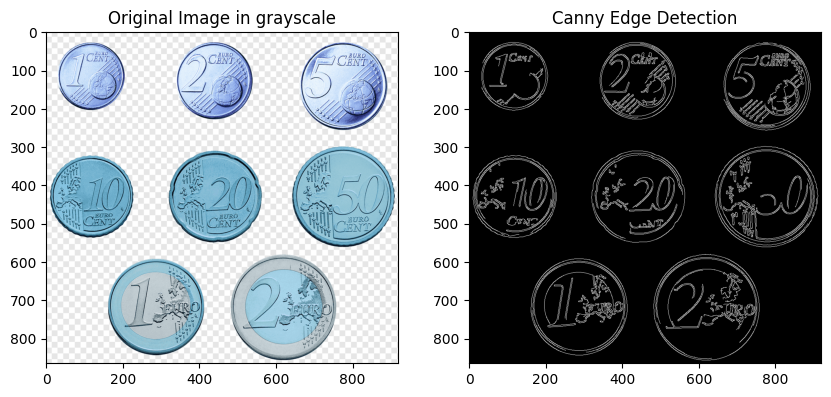

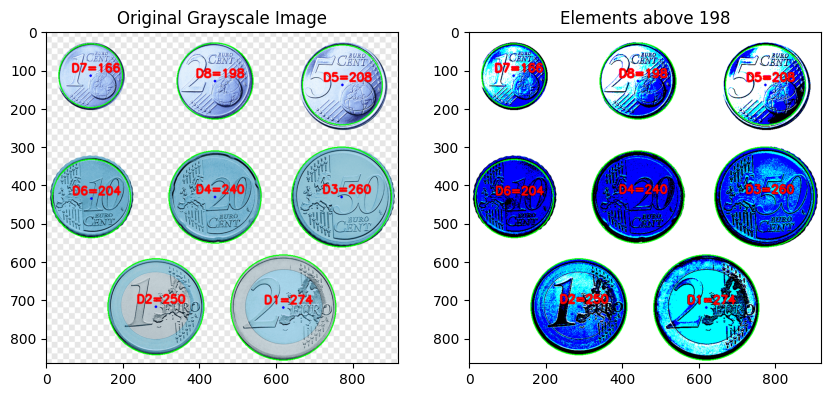

[[0.25]
 [0.5 ]
 [0.25]]
Values of circles:
 [[[618 720 137]
  [286 718 125]
  [770 432 130]
  [440 432 120]
  [772 140 104]
  [118 436 102]
  [116 116  83]
  [440 130  99]]]
List of radii [137, 125, 130, 120, 104, 102, 83, 99]
List of av values: [178.436875, 172.16979166666667, 164.686875, 155.16895833333334, 202.18333333333334, 140.80895833333332, 200.74041666666668, 192.38604166666667]


In [2]:
def av_pix(image, circles, size):
    av_values = []
    
    for coords in circles[0, :]:
        col = np.mean(image[coords[1]-size:coords[1]+size, coords[0]-size:coords[0]+size])
        av_values.append(col)
    return av_values

# Load the image
image = cv.imread("../Projects/CV/CannyDetection/coins.png", 1)  # Read as grayscale

# Apply GaussianBlur
blurred = cv.GaussianBlur(image, (5, 5), 0) # Compute G(x,y), sigma = 0 (standard deviation of the Gaussian)

# Apply Canny edge detection
edges = cv.Canny(blurred, 100, 400)  # Adjust the threshold values as needed
# Best conf for "coins" image at cv.Canny(blurred, 100, 400)
# Best conf for "morecoins" image at cv.Canny(blurred, 100, 300)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image in grayscale')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()

# Use Hough Circle Transform to detect circles
circles = cv.HoughCircles(
    edges, cv.HOUGH_GRADIENT, dp=1, minDist=40,
    param1=10, param2=50, minRadius=80, maxRadius=140 # To be modified for every image to get to the exact diameters
    # Best conf for "morecoins" image at param1=10, param2=30, minRadius=18, maxRadius=100
    # Best conf for "morecoins" image at param1=15, param2=31, minRadius=10, maxRadius=100
    # Actually i realized that param2 can solve the problem of having abberant circles that are generated in non circle shaped parts of the image
    # The more param2 is increased the better (at some level before loosing other data)
)

# Draw the detected circles on the original image and display diameter
radii = []
count = 1
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        radii.append(radius)
        diameter = 2 * radius
        cv.circle(image, center, radius, (0, 255, 0), 2)  # Green circle
        cv.circle(image, center, 2, (0, 0, 255), 2) # just to see the center
        cv.putText(image, f"D{count}={diameter}", (center[0] - 50, center[1] - 10),
                cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv.LINE_AA)
        count+=1
        
# # Display the result
# plt.imshow(image, cmap="gray")
# plt.title("Detected Circles with Diameters")
# plt.show()

# Classifying elements of the image

threshold_value = 198

# Threshold the image to classify elements
_, binary_image = cv.threshold(image, threshold_value, 255, cv.THRESH_BINARY)

# Display the original and binary images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f'Elements above {threshold_value}')

plt.show()

print(cv.getGaussianKernel(3,0))

print("Values of circles:\n", circles)

print("List of radii", radii)

bright_values = av_pix(image=image, circles=circles, size=20)
print("List of av values:", bright_values)

classifcation_values = []